Для решения задачи поиска аномалий была рассмотрена вспомогательная задача классификации звуков города из датасета "UrbanSound"

Датасет составлен с помощью *APi* Youtube8m

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("../data/urban/UrbanSound8K.csv")
data.shape

(8732, 8)

In [3]:
data.head()

slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing

In [4]:
appended = []
for i in range(1,11):
    appended.append(data[data.fold == i]['class'].value_counts())
    
class_distribution = pd.DataFrame(appended)
class_distribution = class_distribution.reset_index()
class_distribution['index'] = ["fold"+str(x) for x in range(1,11)]
class_distribution

class   index  jackhammer  dog_bark  children_playing  street_music  \
0       fold1         120       100               100           100   
1       fold2         120       100               100           100   
2       fold3         120       100               100           100   
3       fold4         120       100               100           100   
4       fold5         120       100               100           100   
5       fold6          68       100               100           100   
6       fold7          76       100               100           100   
7       fold8          78       100               100           100   
8       fold9          82       100               100           100   
9      fold10          96       100               100           100   

class  air_conditioner  drilling  engine_idling  siren  car_horn  gun_shot  
0                  100       100             96     86        36        35  
1                  100       100            100     91        42        35  
2                  100       100            107    119        43        36  
3                  100       100            107    166        59        38  
4                  100       100            107     71        98        40  
5                  100       100            107     74        28        46  
6                  100       100            106     77        28        51  
7                  100       100             88     80        30        30  
8                  100       100             89     82        32        31  
9                  100       100             93     83        33        32

In [5]:
data['class'].value_counts(normalize=True)

class
dog_bark            0.114521
children_playing    0.114521
air_conditioner     0.114521
street_music        0.114521
engine_idling       0.114521
jackhammer          0.114521
drilling            0.114521
siren               0.106390
car_horn            0.049130
gun_shot            0.042831
Name: proportion, dtype: float64

In [6]:
import os
import struct
from scipy.io import wavfile as wav
import matplotlib.pyplot as plt
import IPython.display as ipd

def path_class(filename):
    excerpt = data[data['slice_file_name'] == filename]
    path_name = os.path.join('../data/urban/', 'fold'+str(excerpt.fold.values[0]), filename)
    return path_name, excerpt['class'].values[0]

def wav_plotter(full_path, class_label):   
    rate, wav_sample = wav.read(full_path)
    wave_file = open(full_path,"rb")
    riff_fmt = wave_file.read(36)
    bit_depth_string = riff_fmt[-2:]
    bit_depth = struct.unpack("H",bit_depth_string)[0]
    print('sampling rate: ',rate,'Hz')
    print('bit depth: ',bit_depth)
    print('number of channels: ',wav_sample.shape[1])
    print('duration: ',wav_sample.shape[0]/rate,' second')
    print('number of samples: ',len(wav_sample))
    print('class: ',class_label)
    plt.figure(figsize=(12, 4))
    plt.plot(wav_sample) 
    return ipd.Audio(full_path)

sampling rate:  44100 Hz
bit depth:  16
number of channels:  2
duration:  4.0  second
number of samples:  176400
class:  children_playing


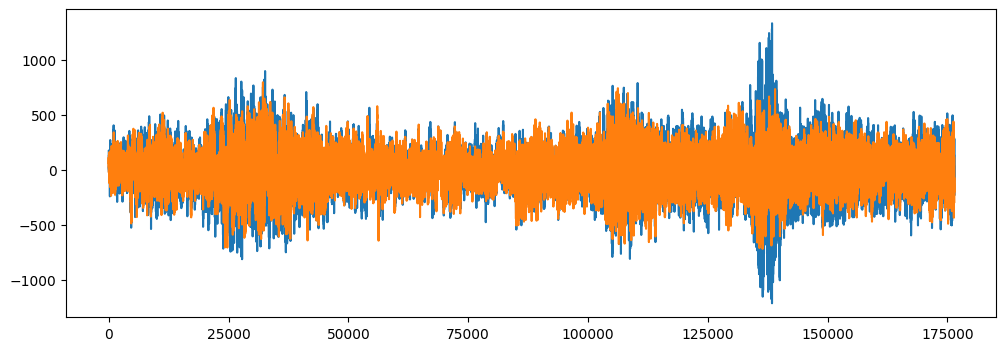

In [7]:
fullpath, label = path_class('100263-2-0-117.wav')
wav_plotter(fullpath,label)

In [8]:
import librosa
import IPython.display as ipd

In [9]:
y, sr = librosa.load('../data/urban/fold1/7383-3-0-0.wav')

In [10]:
import seaborn as sns

Text(0.5, 1.0, 'Class Distribution')

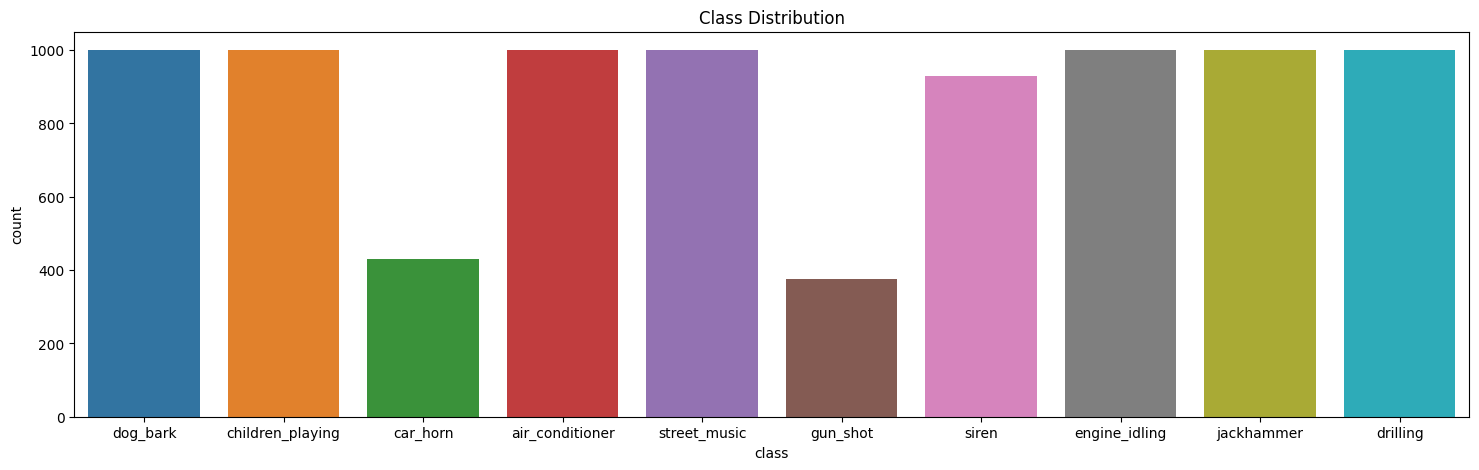

In [11]:
Class = data.value_counts()
f, ax = plt.subplots(figsize=(18,5)) 
ax = sns.countplot(x=data['class'], data=data['class'])
plt.title('Class Distribution')

классы *car_horn* и *gun_shot* имеют меньшее число объектов в сравнении с другим классами

In [12]:
ipd.Audio(data=y, rate=sr)

In [13]:
y

array([ 3.4924597e-10,  3.4924597e-10,  4.6566129e-10, ...,
       -7.9498515e-03, -7.7366987e-03, -8.0531817e-03], dtype=float32)

In [14]:
sr

22050

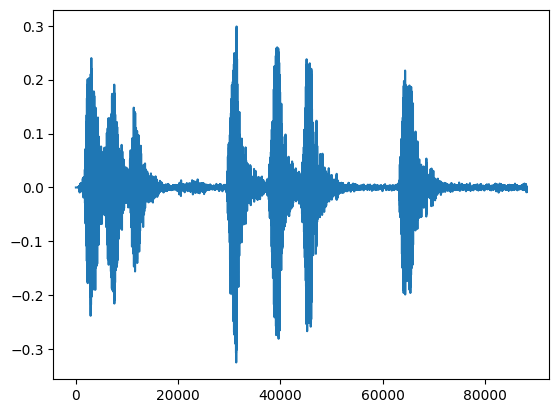

In [15]:
plt.plot(y)

Одним из методов аппроксимации звукового сигнала является метод наименьших квадратов, он помогает удалять шумы и представлять звуковой сигнал в виде комбинации полиноминальных функций

In [16]:
def PolyCoefficients(x, coeffs):
    o = len(coeffs)
    print(f'# This is a polynomial of order {ord}.')
    y = 0
    for i in range(o):
        y += coeffs[i]*(x**i)
    return y

In [17]:
x = np.linspace(0,sr*4,sr*4)

In [18]:
coeffs = np.polyfit(x, y,25)
coeffs = np.flip(coeffs)


c:\Users\malya\Desktop\kernelModeling\KernelModelingONIIP\venv\lib\site-packages\IPython\core\interactiveshell.py:3508: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


# This is a polynomial of order <built-in function ord>.


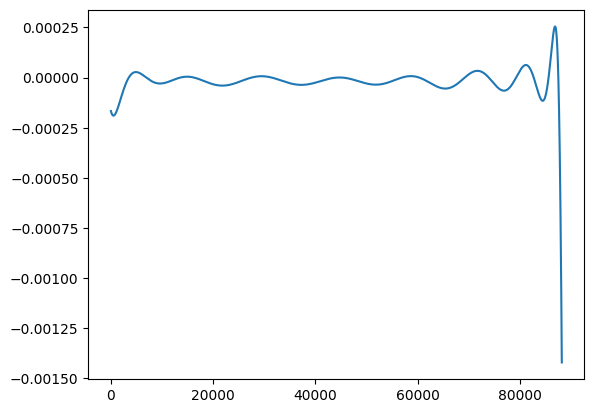

In [19]:

plt.plot(x, PolyCoefficients(x, coeffs))
plt.show()

Рассмотрев полиномы степеней 1,2,3...25, пришли к выводу, что данный метод не подходит для представления нашего звукового сигнала, так как звук имеет хаотичный характер и его нельзя описать с помощью полиномов.

Далее были рассмотрены более сложные методы, такие как вейвлет-преобразования. 

In [20]:
from scipy import signal

In [21]:
discrete_wavelets = ['db5', 'sym5', 'coif5', 'haar']

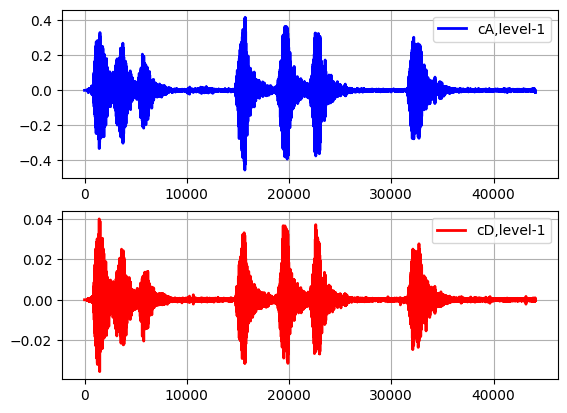

In [22]:
import pywt
from pylab import *
from numpy import *
st='haar'
(cA, cD) = pywt.dwt(y,st)
subplot(2, 1, 1)
plot(cA,'b',linewidth=2, label='cA,level-1')
grid()
legend(loc='best')
subplot(2, 1, 2)
plot(cD,'r',linewidth=2, label='cD,level-1')
grid()
legend(loc='best')
show()

Эксперименты с ядром вейвлет-функции не дали ощутимых результатов, поэтому нет особой разницы в его выборе.

Также было рассмотрено несколько уровней вейвлет-преобразования, после каждого такого уровня длинна звуковой дорожки уменьшается вполовину.

In [23]:
ipd.Audio(data=cA, rate=sr)

In [24]:
ipd.Audio(data=cD, rate=sr)

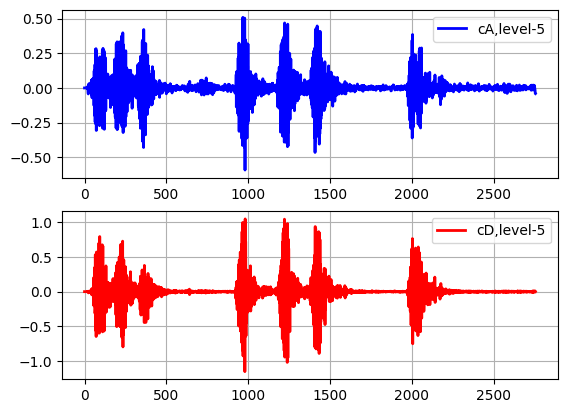

In [25]:
(cA, cD) = pywt.dwt(y,st)
(cA, cD) = pywt.dwt(cA,st)
(cA, cD) = pywt.dwt(cA,st)
(cA, cD) = pywt.dwt(cA,st)
(cA, cD) = pywt.dwt(cA,st)
subplot(2, 1, 1)
plot(cA,'b',linewidth=2, label='cA,level-5')
grid()
legend(loc='best')
subplot(2, 1, 2)
plot(cD,'r',linewidth=2, label='cD,level-5')
grid()
legend(loc='best')
show()

Как итог: вейвлет-преобразование помогает хорошо описать сигнал, экономя пространство на диске и сохраняя нужную информацию

In [26]:
ipd.Audio(data=cA, rate=sr)

In [27]:
ipd.Audio(data=cD, rate=sr)

В звук можно добавить шум, чтобы расширить количество объектов и протестировать методы, которые борятся с шумом и помехами.

In [28]:
noise = np.random.randn(len(y))
data_noise = y + 0.005 * noise
ipd.Audio(data=data_noise, rate=sr)

In [29]:
y_third = librosa.effects.pitch_shift(y =y,sr = sr, n_steps=20)
ipd.Audio(data=y_third, rate=sr)

Попробуем на практике применить фильтр Калмана

In [30]:
from pykalman import KalmanFilter

In [31]:
kf = KalmanFilter(transition_matrices=np.array([[1, 1], [0, 1]]),
                  transition_covariance=0.01 * np.eye(2))

In [32]:
import numpy as np
from pykalman import KalmanFilter

observations = data_noise
x = np.linspace(0,sr*4,sr*4)

filtered_state_estimates = kf.filter(observations)
smoothed_state_estimates = kf.smooth(observations)


In [33]:
filtered_state_estimates

(array([[-0.00105324,  0.        ],
        [ 0.00314953,  0.00278329],
        [ 0.00218002,  0.00090689],
        ...,
        [-0.00651985, -0.00054381],
        [-0.00796786, -0.00073868],
        [-0.00671413, -0.00030929]]),
 array([[[0.5       , 0.        ],
         [0.        , 1.        ]],
 
        [[0.60159363, 0.39840637],
         [0.39840637, 0.61159363]],
 
        [[0.66887417, 0.33443709],
         [0.33443709, 0.28381217]],
 
        ...,
 
        [[0.36868629, 0.07945525],
         [0.07945525, 0.04640175]],
 
        [[0.36868629, 0.07945525],
         [0.07945525, 0.04640175]],
 
        [[0.36868629, 0.07945525],
         [0.07945525, 0.04640175]]]))

In [34]:
filtered_state_estimates

(array([[-0.00105324,  0.        ],
        [ 0.00314953,  0.00278329],
        [ 0.00218002,  0.00090689],
        ...,
        [-0.00651985, -0.00054381],
        [-0.00796786, -0.00073868],
        [-0.00671413, -0.00030929]]),
 array([[[0.5       , 0.        ],
         [0.        , 1.        ]],
 
        [[0.60159363, 0.39840637],
         [0.39840637, 0.61159363]],
 
        [[0.66887417, 0.33443709],
         [0.33443709, 0.28381217]],
 
        ...,
 
        [[0.36868629, 0.07945525],
         [0.07945525, 0.04640175]],
 
        [[0.36868629, 0.07945525],
         [0.07945525, 0.04640175]],
 
        [[0.36868629, 0.07945525],
         [0.07945525, 0.04640175]]]))

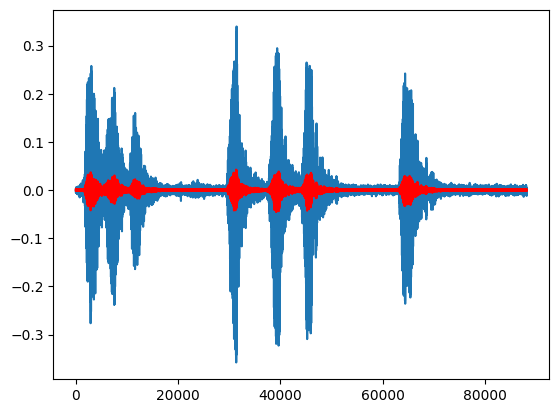

In [35]:

plt.plot(x,filtered_state_estimates[0][:,0])
plt.plot(x,filtered_state_estimates[0][:,1],c = 'r')

In [36]:
ipd.Audio(data=filtered_state_estimates[0][:,1], rate=sr)

In [37]:
ipd.Audio(data=smoothed_state_estimates[0][:,1], rate=sr)

Рассмотрели пороговые методы фильтрации частот, lowpass - фильтр нижних частот, highpass - фильтр высоких частот, bandpass - полосовой фильтр, bandstop - заграждающий фильтр.

In [38]:
from scipy import signal
 
b, a = signal.butter(5, 0.1, 'lowpass')   
filtedData = signal.filtfilt(b, a, y)

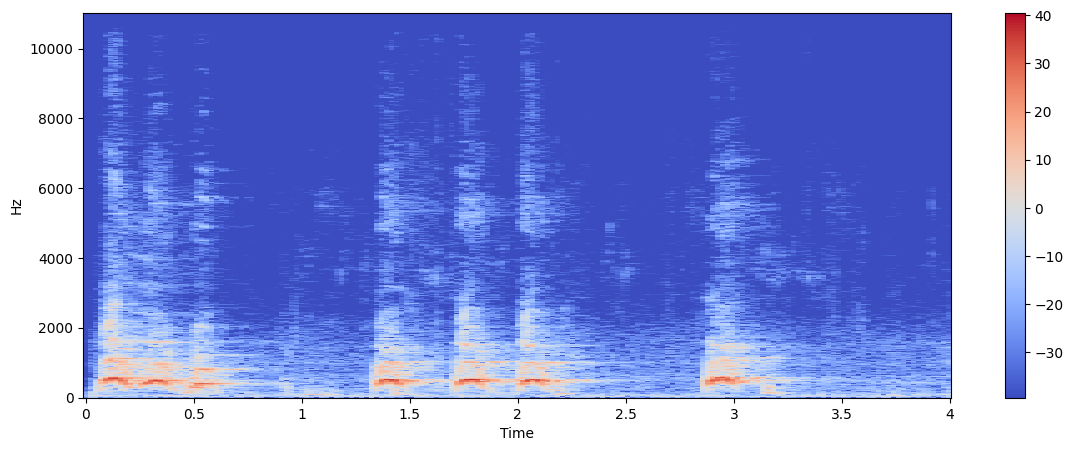

In [39]:
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

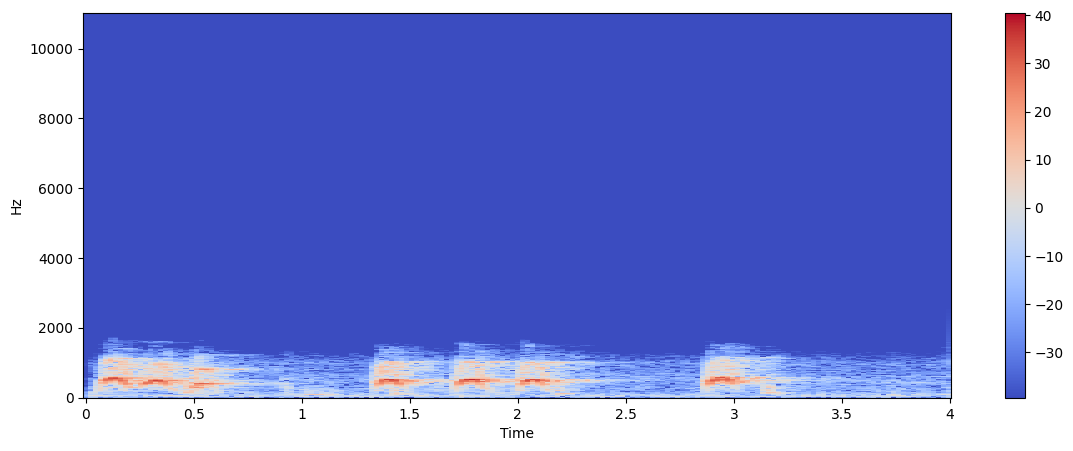

In [40]:
X = librosa.stft(filtedData)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

In [41]:
ipd.Audio(data=filtedData, rate=sr)

In [42]:
b, a = signal.butter(8, 0.2, 'highpass')   
filtedData2 = signal.filtfilt(b, a, y)

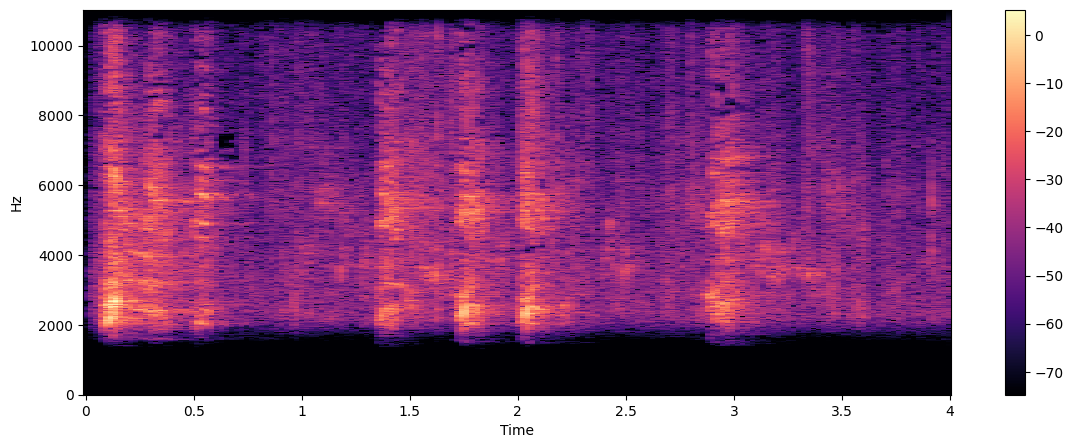

In [43]:
X = librosa.stft(filtedData2)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

In [44]:
ipd.Audio(data=filtedData2, rate=sr)

In [45]:
from scipy import signal
 
b, a = signal.butter(8, [0.1,0.6], 'bandpass')  
filtedData3 = signal.filtfilt(b, a,y)

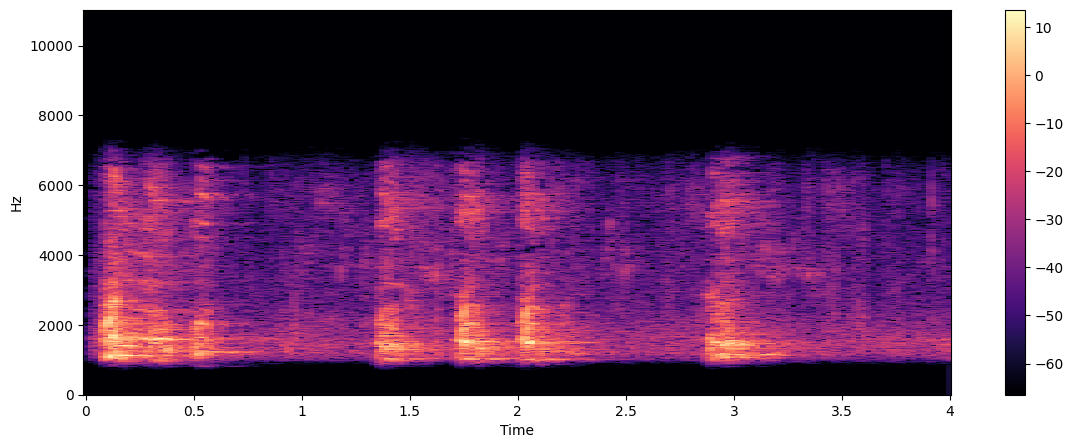

In [46]:
X = librosa.stft(filtedData3)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

In [47]:
ipd.Audio(data=filtedData3, rate=sr)

In [48]:
b, a = signal.butter(8, [0.2,0.8], 'bandstop')   
filtedData4 = signal.filtfilt(b, a, y) 

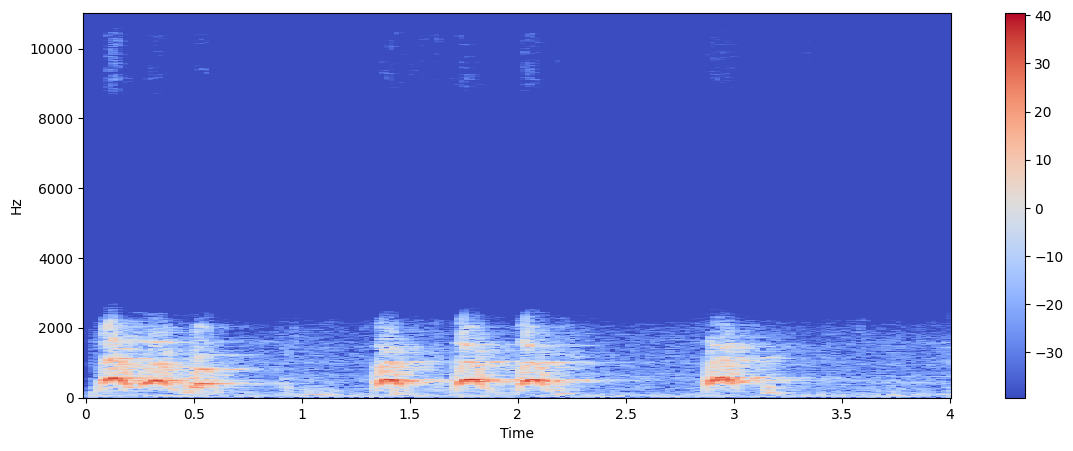

In [49]:
X = librosa.stft(filtedData4)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

In [50]:
ipd.Audio(data=filtedData4, rate=sr)

In [51]:
from pathlib import Path

In [52]:
def create_melspec(filename,name,dirr):
    plt.interactive(False)
    clip, sample_rate = librosa.load(filename, duration=2.97)
    fig = plt.figure(figsize=[0.72,0.72])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    S = librosa.feature.melspectrogram(y=clip, sr=sample_rate,n_fft=2048, hop_length=512)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
    filename  = Path('../data/melspec/' + dirr +'/' +name + '.jpg')
    plt.savefig(filename, dpi=400, bbox_inches='tight',pad_inches=0)
    plt.close()    
    fig.clf()
    plt.close(fig)
    plt.close('all')
    del filename,name,clip,sample_rate,fig,ax,S

In [301]:
data.head()

slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing

In [305]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB


In [310]:
data.values

array([['100032-3-0-0.wav', 100032, 0.0, ..., 5, 3, 'dog_bark'],
       ['100263-2-0-117.wav', 100263, 58.5, ..., 5, 2,
        'children_playing'],
       ['100263-2-0-121.wav', 100263, 60.5, ..., 5, 2,
        'children_playing'],
       ...,
       ['99812-1-4-0.wav', 99812, 242.691902, ..., 7, 1, 'car_horn'],
       ['99812-1-5-0.wav', 99812, 253.20985, ..., 7, 1, 'car_horn'],
       ['99812-1-6-0.wav', 99812, 332.289233, ..., 7, 1, 'car_horn']],
      dtype=object)

In [343]:
root_path = '../data/melspec/'
  
list = data['class'].unique()
  
for items in list:
    path = os.path.join(root_path, items)
    os.mkdir(path)

In [344]:
for i in data.values:
    filename = '../data/urban/fold' + str(i[5]) + '/' + str(i[0])
    name = str(i[0])
    dirr = str(i[-1])
    create_melspec(filename,name,dirr)
    


c:\Users\malya\Desktop\kernelModeling\KernelModelingONIIP\venv\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
c:\Users\malya\Desktop\kernelModeling\KernelModelingONIIP\venv\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
c:\Users\malya\Desktop\kernelModeling\KernelModelingONIIP\venv\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
c:\Users\malya\Desktop\kernelModeling\KernelModelingONIIP\venv\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
c:\Users\malya\Desktop\kernelModeling\KernelModelingONIIP\venv\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(


In [325]:
import tensorflow as tf

In [345]:
train_ds, test_ds = tf.keras.utils.image_dataset_from_directory(
    "../data/melspec", 
    validation_split=0.2, 
    subset="both", 
    seed=42, 
    image_size=(224,224),
    batch_size=32,
)

Found 8732 files belonging to 10 classes.
Using 6986 files for training.
Using 1746 files for validation.


Воспользовались мел-спектограммами для того, чтобы обучить сверточную нейронную сеть и классифицировать звуки, предоставленные в датасете.

In [349]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = tf.keras.layers.Rescaling(1.0 / 255)(inputs)
x = tf.keras.layers.Conv2D(64, 3, strides=2, padding="same")(x)
x = tf.keras.layers.MaxPooling2D(3, strides=2, padding="same")(x)
x = tf.keras.layers.Conv2D(128, 4, strides=2, padding="same")(x)
x = tf.keras.layers.MaxPooling2D(3, strides=2, padding="same")(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(64, activation="relu")(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)
model = tf.keras.Model(inputs, outputs)

In [350]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [351]:
model.fit(train_ds, epochs=5, validation_data=test_ds)

Epoch 1/5


219/219 [==============================] - 104s 466ms/step - loss: 1.5866 - accuracy: 0.4572 - val_loss: 1.2146 - val_accuracy: 0.5922
Epoch 2/5
219/219 [==============================] - 79s 362ms/step - loss: 0.9209 - accuracy: 0.6891 - val_loss: 0.9219 - val_accuracy: 0.6930
Epoch 3/5
219/219 [==============================] - 84s 384ms/step - loss: 0.6865 - accuracy: 0.7803 - val_loss: 0.8978 - val_accuracy: 0.7228
Epoch 4/5
219/219 [==============================] - 98s 448ms/step - loss: 0.5317 - accuracy: 0.8267 - val_loss: 0.7370 - val_accuracy: 0.7732
Epoch 5/5
219/219 [==============================] - 80s 362ms/step - loss: 0.3941 - accuracy: 0.8739 - val_loss: 0.6186 - val_accuracy: 0.8230


In [352]:
vgg = tf.keras.applications.VGG19(weights='imagenet', include_top=True)
vgg.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [353]:
inp = vgg.input

new_classification_layer = tf.keras.layers.Dense(10, activation='softmax')

out = new_classification_layer(vgg.layers[-2].output)

model_new = tf.keras.Model(inp, out)

In [354]:
for layer in model_new.layers:
    layer.trainable = False
model_new.layers[-1].trainable = True

In [355]:
model_new.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_new.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [356]:
model_new.fit(train_ds, epochs=5, validation_data=test_ds)

Epoch 1/5


219/219 [==============================] - 1287s 6s/step - loss: 1.0159 - accuracy: 0.6685 - val_loss: 0.7591 - val_accuracy: 0.7635
Epoch 2/5
219/219 [==============================] - 1272s 6s/step - loss: 0.5947 - accuracy: 0.8030 - val_loss: 0.6739 - val_accuracy: 0.7835
Epoch 3/5
219/219 [==============================] - 1143s 5s/step - loss: 0.4675 - accuracy: 0.8418 - val_loss: 0.6756 - val_accuracy: 0.7887
Epoch 4/5
219/219 [==============================] - 1254s 6s/step - loss: 0.3888 - accuracy: 0.8654 - val_loss: 0.6126 - val_accuracy: 0.8058
Epoch 5/5
219/219 [==============================] - 1338s 6s/step - loss: 0.3376 - accuracy: 0.8859 - val_loss: 0.5578 - val_accuracy: 0.8207


In [359]:
from sklearn.metrics import classification_report
y_pred_ds = model_new.predict(test_ds)


55/55 [==============================] - 220s 4s/step


In [370]:
pred = [np.argmax(pred) for pred in y_pred_ds]

y_test = np.array([])

images, labels = tuple(zip(*test_ds))
for i in labels:
    y_test = np.append(y_test, i)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.86      0.76      0.81       199
         1.0       0.90      0.64      0.75        73
         2.0       0.72      0.86      0.78       198
         3.0       0.85      0.75      0.80       207
         4.0       0.88      0.79      0.83       198
         5.0       0.78      0.93      0.85       218
         6.0       0.99      0.86      0.92        78
         7.0       0.79      0.94      0.86       171
         8.0       0.93      0.82      0.87       217
         9.0       0.73      0.76      0.74       187

    accuracy                           0.82      1746
   macro avg       0.84      0.81      0.82      1746
weighted avg       0.83      0.82      0.82      1746



In [371]:
y_pred_ds2 = model.predict(test_ds)

55/55 [==============================] - 7s 124ms/step


In [372]:
pred = [np.argmax(pred) for pred in y_pred_ds2]

y_test = np.array([])

images, labels = tuple(zip(*test_ds))
for i in labels:
    y_test = np.append(y_test, i)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.70      0.91      0.79       199
         1.0       0.98      0.84      0.90        73
         2.0       0.83      0.51      0.63       198
         3.0       0.74      0.87      0.80       207
         4.0       0.91      0.83      0.87       198
         5.0       0.92      0.88      0.90       218
         6.0       0.97      0.94      0.95        78
         7.0       0.90      0.85      0.87       171
         8.0       0.88      0.88      0.88       217
         9.0       0.67      0.80      0.73       187

    accuracy                           0.82      1746
   macro avg       0.85      0.83      0.83      1746
weighted avg       0.83      0.82      0.82      1746



В итоге, модель, обученная с помощью TransferLearning, показала разницу в точности, несравнимую со скоростью получения предсказания, поэтому, в переспективе, стоит остановиться на моделях собсвенной архитектуры